# Heart Disease Prediction
Will a patient have a 10 year risk of developing a cardio vascular diseases?

# Table of contents
1: Introduction

2: Exploratory Data Analysis

3: Feature Selection

4: Feature Scaling

5: Test - Train Split

6: Resampling

7: Model Pipeline

8: Modelling & Evaluation


# Introduction 
Problem: The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

Source: The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# Attributes:

Demographic:
Sex: male or female(Nominal)

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education: no further information provided

Behavioral:
Current Smoker: whether or not the patient is a current smoker (Nominal)

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can 
have any number of cigarettes, even half a cigarette.)

Information on medical history:
BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

Information on current medical condition:
Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
Glucose: glucose level (Continuous)

Target variable to predict:
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Import and read the data
data = pd.read_csv(r"C:\Users\polep\OneDrive - Högskolan Dalarna\Desktop\Interview\portfolio_projects\Framingham Heart Study\Framingham-Heart-Study-master\framingham.csv")
# First five rows of dataframe
data.head(10)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
# dataframe columns
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
# shape of the dataframe
data.shape

(4240, 16)

In [5]:
# checking for null values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# drop null values
new_data = data.dropna(how = "any")

In [7]:
new_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
# statistical describe of dataframe
new_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Exploratory Data Analysis

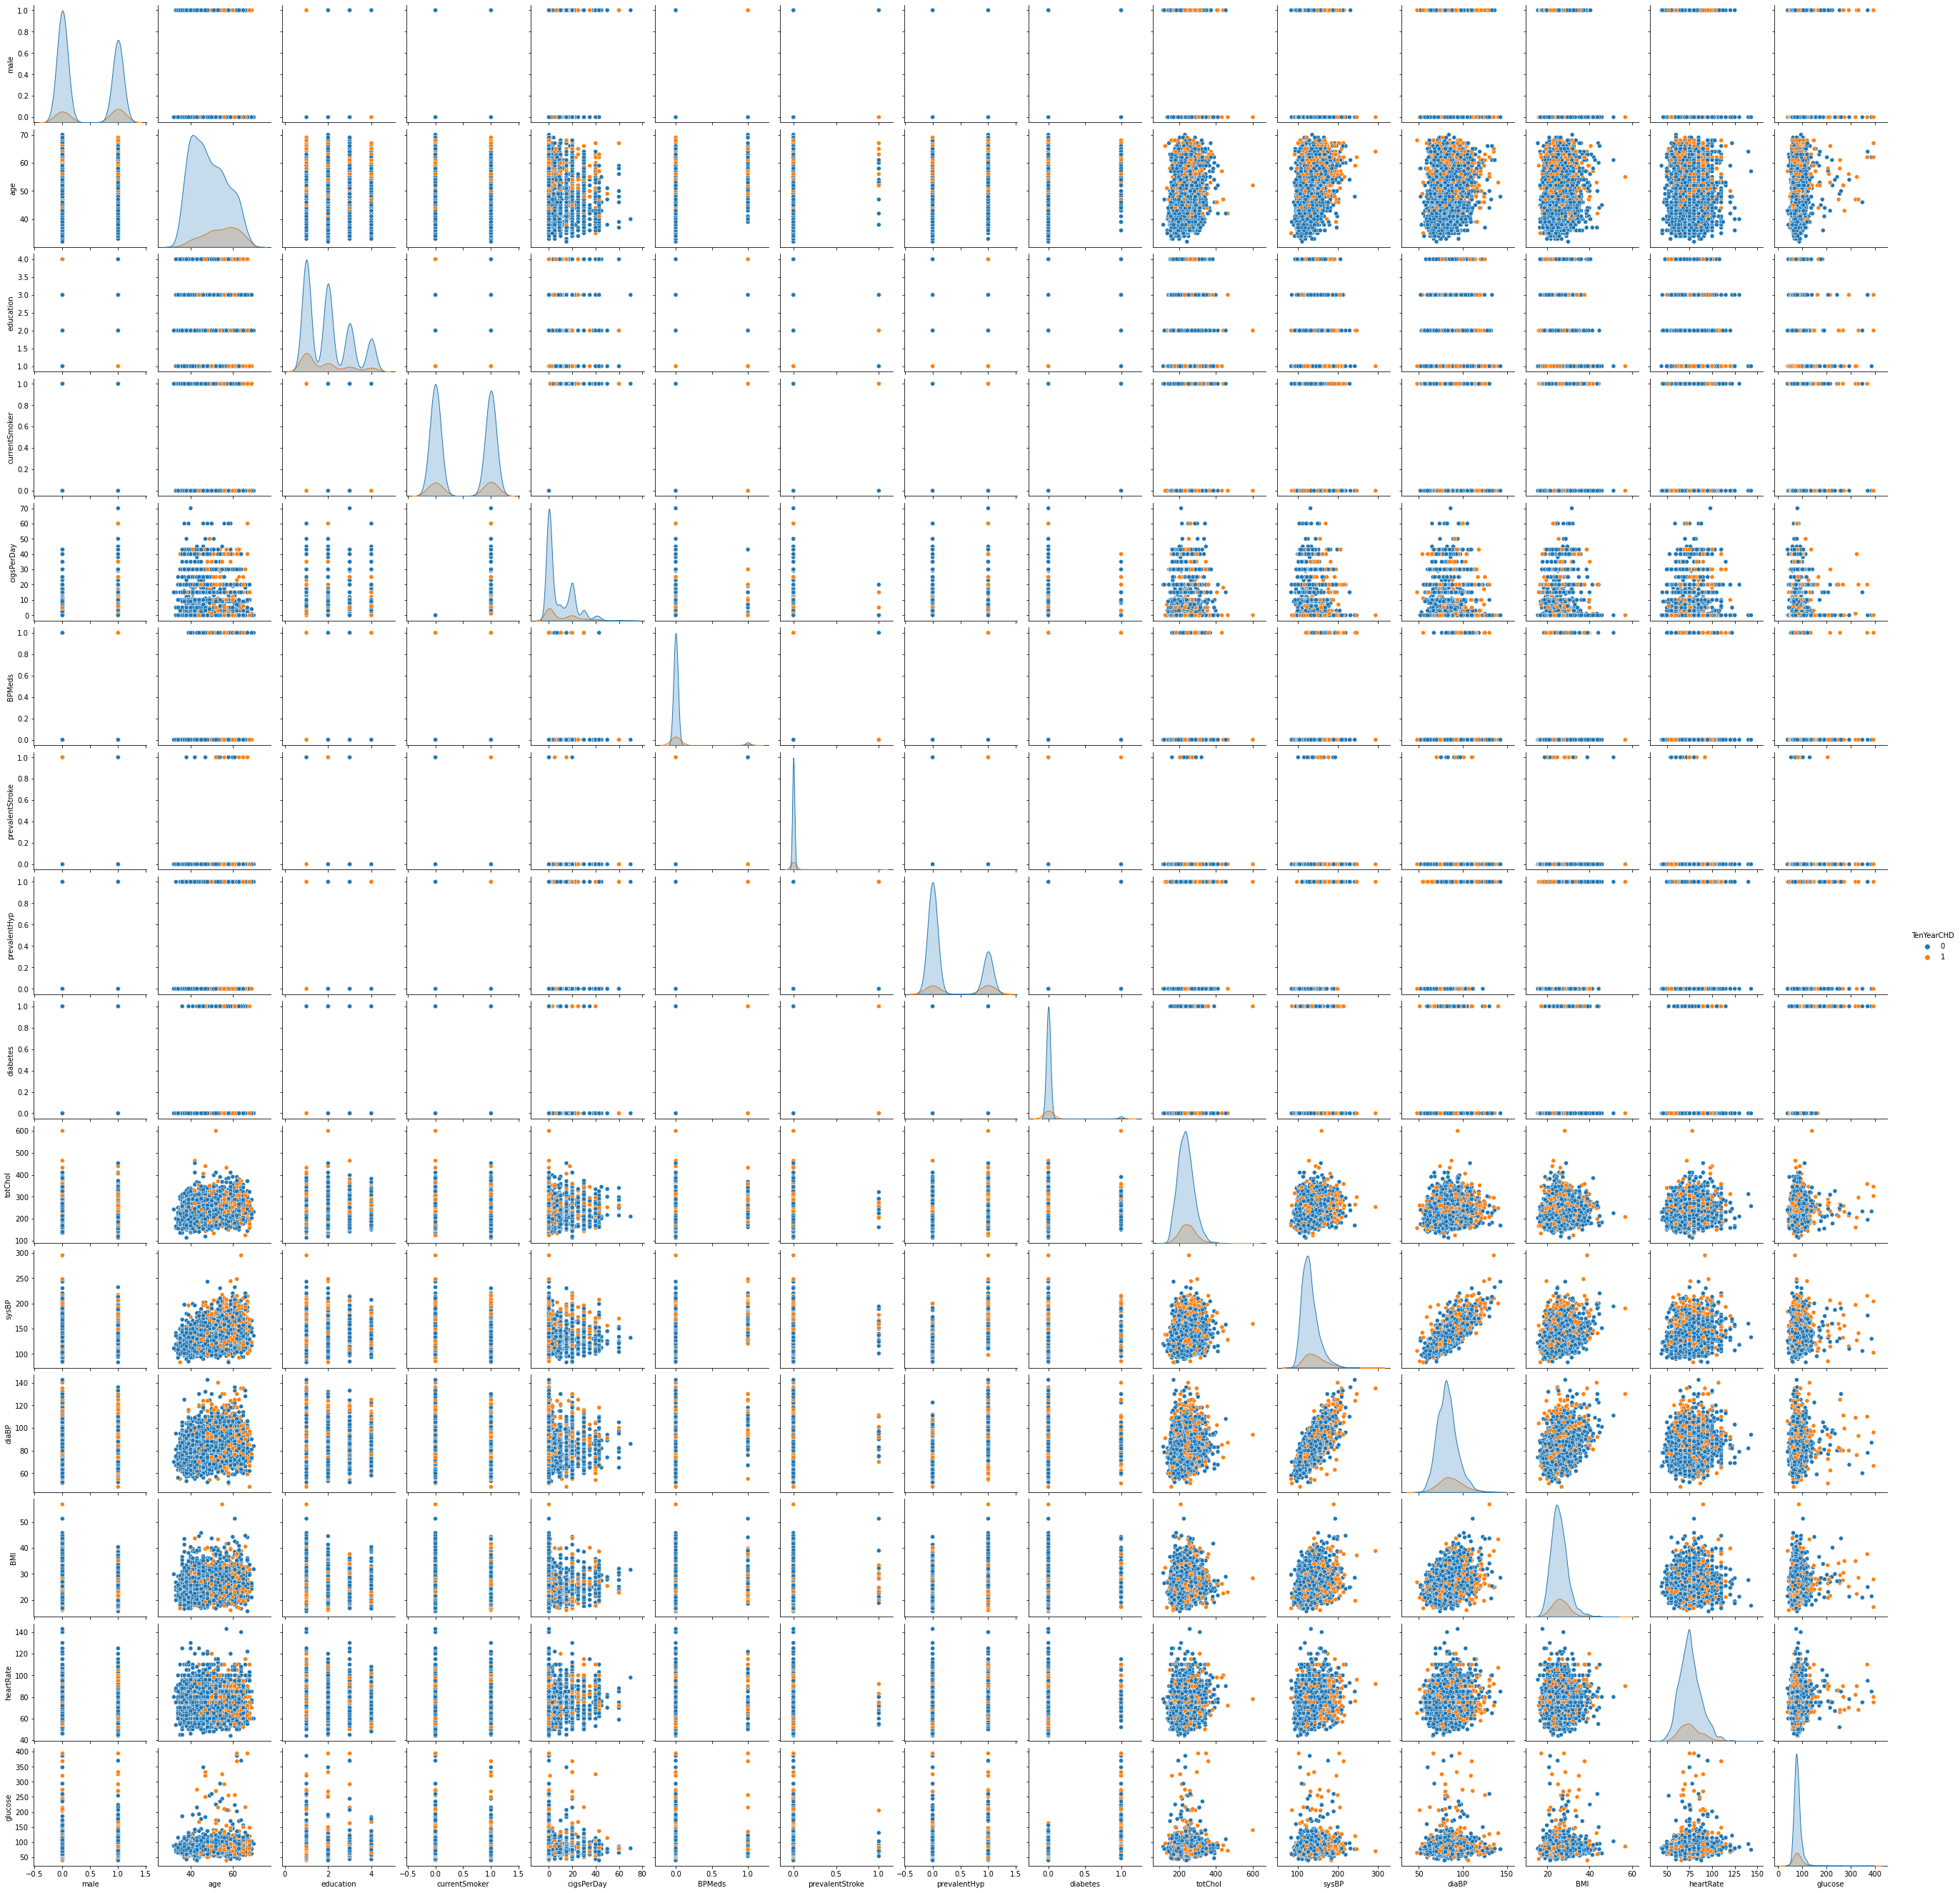

In [9]:

# checking distributions using pairplots
sns.pairplot(new_data, hue = "TenYearCHD")

C:\Users\polep\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\polep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


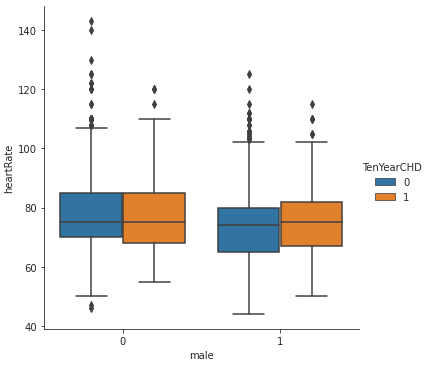

In [10]:
## factor plots

with sns.axes_style(style = "ticks"):
    g = sns.factorplot("male", "heartRate", "TenYearCHD",data = new_data, kind = "box")
    g.set_axis_labels("male", "heartRate")

Observations from the factor plot that TenYearCHD higher consist in female which has HearRate between from 70 to 90.

C:\Users\polep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


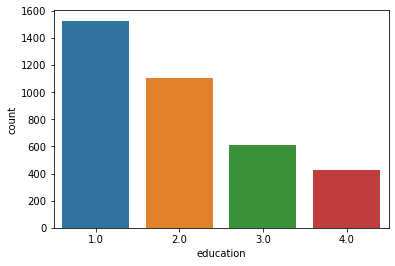

In [11]:
sns.countplot("education", data = new_data);

from education 1 contains higher number of data from the dataframe

In [12]:
total_values = new_data["TenYearCHD"].value_counts()
print(total_values)


0    3101
1     557
Name: TenYearCHD, dtype: int64


From (the above value counts of TenYearCHD is that 0(No) is 3101 and 1(Yes) is 557. The target variables look like imbalance data

C:\Users\polep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


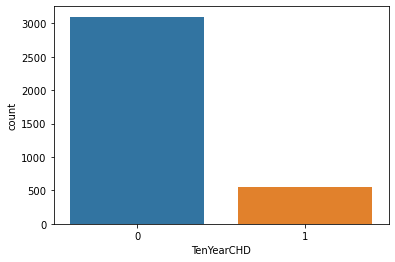

In [13]:

sns.countplot("TenYearCHD", data = new_data);

C:\Users\polep\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CHD by Gender')

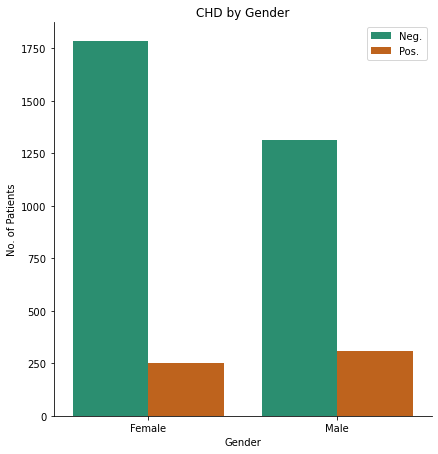

In [14]:
sns.catplot(x='male', hue='TenYearCHD', data=new_data, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

The gender females are higher number of patients consist of CHD than gender males

C:\Users\polep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


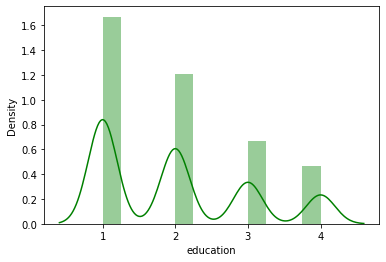

In [15]:
sns.distplot(new_data["education"], color = "green");


C:\Users\polep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\polep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\polep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'distribution of HeartRate')

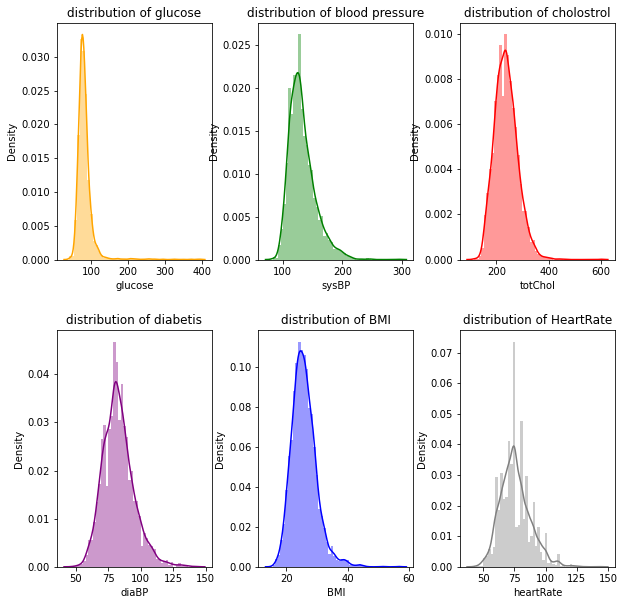

In [16]:
## distribution of continuous variables

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.3  , hspace= 0.3)

plt.subplot(2, 3, 1)
sns.distplot(new_data["glucose"], color = "orange")
plt.title("distribution of glucose")

plt.subplot(2, 3, 2)
sns.distplot(new_data["sysBP"], color = 'g')
plt.title('distribution of blood pressure')

plt.subplot(2, 3, 3)
sns.distplot(new_data['totChol'], color='r')
plt.title("distribution of cholostrol")

plt.subplot(2, 3, 4)
sns.distplot(new_data["diaBP"], color = 'purple')
plt.title("distribution of diabetis")

plt.subplot(2, 3, 5)
sns.distplot(new_data["BMI"], color = 'blue')
plt.title("distribution of BMI")

plt.subplot(2, 3, 6)
sns.distplot(new_data["heartRate"], color = 'grey')
plt.title("distribution of HeartRate")


In [17]:
# age groups

bins= [20,30,40,50,70]
labels = ['20-30','30-50','50-70','70 above',]
new_data['AgeGroup'] = pd.cut(new_data['age'], bins=bins, labels=labels, right=False)

<ipython-input-17-5b63cb6296b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['AgeGroup'] = pd.cut(new_data['age'], bins=bins, labels=labels, right=False)


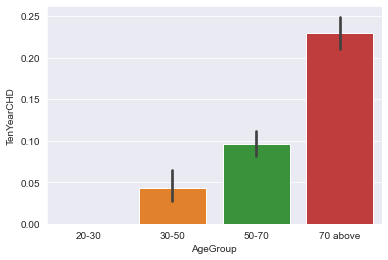

In [18]:
sns.set_style('darkgrid')
sns.barplot(x = "AgeGroup", y= "TenYearCHD", data = new_data)
plt.show()

The important factor from the age group of above 70's are consists of TenYearCHD

C:\Users\polep\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\polep\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\polep\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\polep\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'distribution of diabetes')

<Figure size 720x720 with 0 Axes>

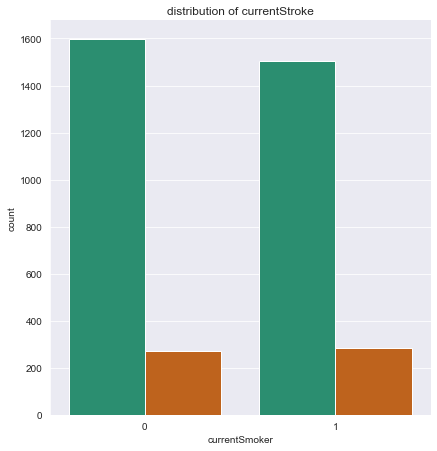

<Figure size 720x720 with 0 Axes>

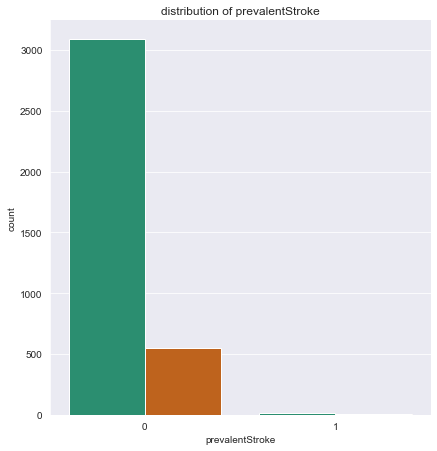

<Figure size 720x720 with 0 Axes>

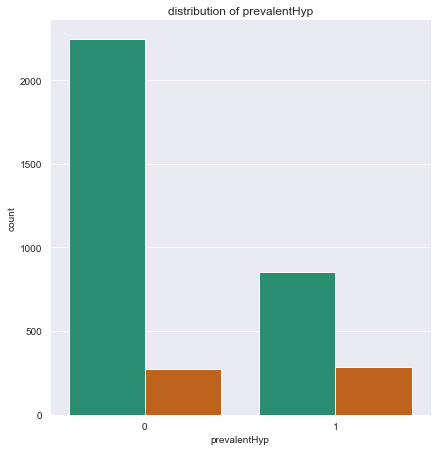

<Figure size 720x720 with 0 Axes>

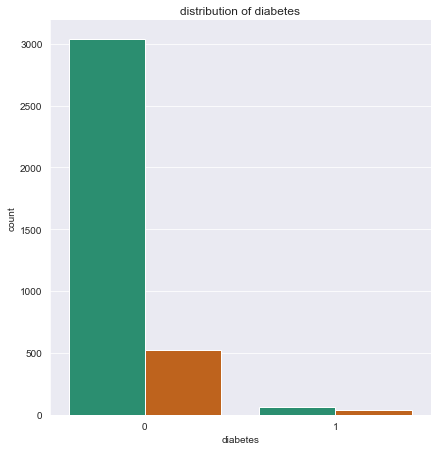

In [19]:

plt.figure(figsize = (10, 10))
sns.catplot(x='currentSmoker', hue='TenYearCHD', data=new_data, kind='count', palette='Dark2', size=6, legend=False)
plt.title("distribution of currentStroke")


plt.figure(figsize = (10, 10))
sns.catplot(x='prevalentStroke', hue='TenYearCHD', data=new_data, kind='count', palette='Dark2', size=6, legend=False)
plt.title("distribution of prevalentStroke")


plt.figure(figsize = (10, 10))
sns.catplot(x='prevalentHyp', hue='TenYearCHD', data=new_data, kind='count', palette='Dark2', size=6, legend=False)
plt.title("distribution of prevalentHyp")

plt.figure(figsize = (10, 10))
sns.catplot(x='diabetes', hue='TenYearCHD', data=new_data, kind='count', palette='Dark2', size=6, legend=False)
plt.title("distribution of diabetes")

In [20]:
#def encode_age(data):
 #   if data <= 40:
  #      return 0
  #  if data > 40 and data <= 55:
   #     return 1
    #else:
     #   return 2
    
def encode_hr(data):
    if data <= 60:
        return 0
    if data > 60 and data <= 100:
        return 1
    else:
        return 2
    


In [21]:
#new_data['encode_age'] = new_data['age'].apply(lambda x : encode_age(x))
new_data["encode_hr"] = new_data['heartRate'].apply(lambda x: encode_hr(x))

<ipython-input-21-2511e8ad4de8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["encode_hr"] = new_data['heartRate'].apply(lambda x: encode_hr(x))


In [22]:
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeGroup,encode_hr
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-50,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,50-70,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,50-70,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,70 above,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,50-70,1


In [23]:
new_data['encode_hr'].replace([0, 1, 2], ['Low', 'Normal Enc_hr', "high"], inplace = True)


C:\Users\polep\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


C:\Users\polep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


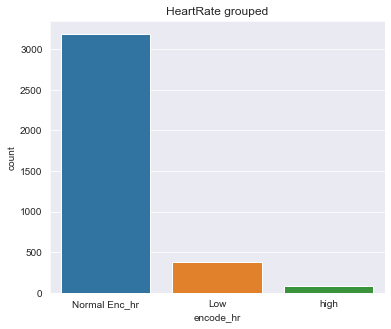

In [24]:
# Counting heartrate by grouping

plt.figure(figsize = (6, 5))
plt.title("HeartRate grouped")
sns.countplot("encode_hr",  data = new_data);

<AxesSubplot:title={'center':'diaBP by age group'}, xlabel='AgeGroup', ylabel='diaBP'>

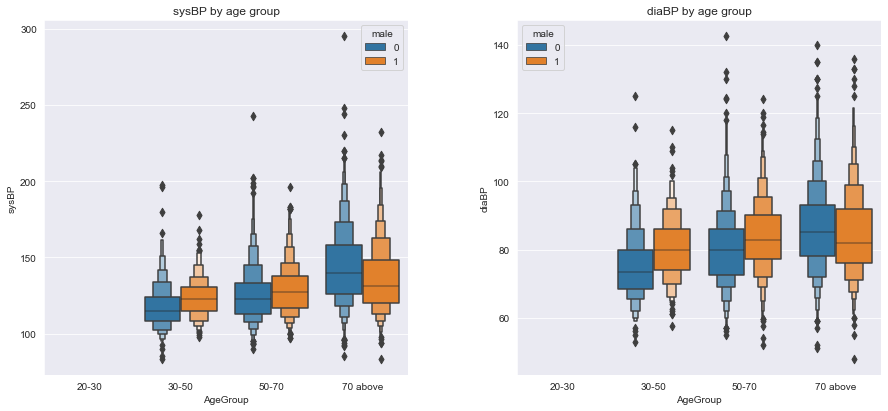

In [25]:
# multivariate analysis
plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.subplot(2, 2, 1)
plt.title("sysBP by age group")
sns.boxenplot(x= "AgeGroup", y = "sysBP", hue = "male", data = new_data)


plt.subplot(2, 2, 2)
plt.title("diaBP by age group")
sns.boxenplot(x= "AgeGroup", y = "diaBP", hue = "male", data = new_data)


<AxesSubplot:>

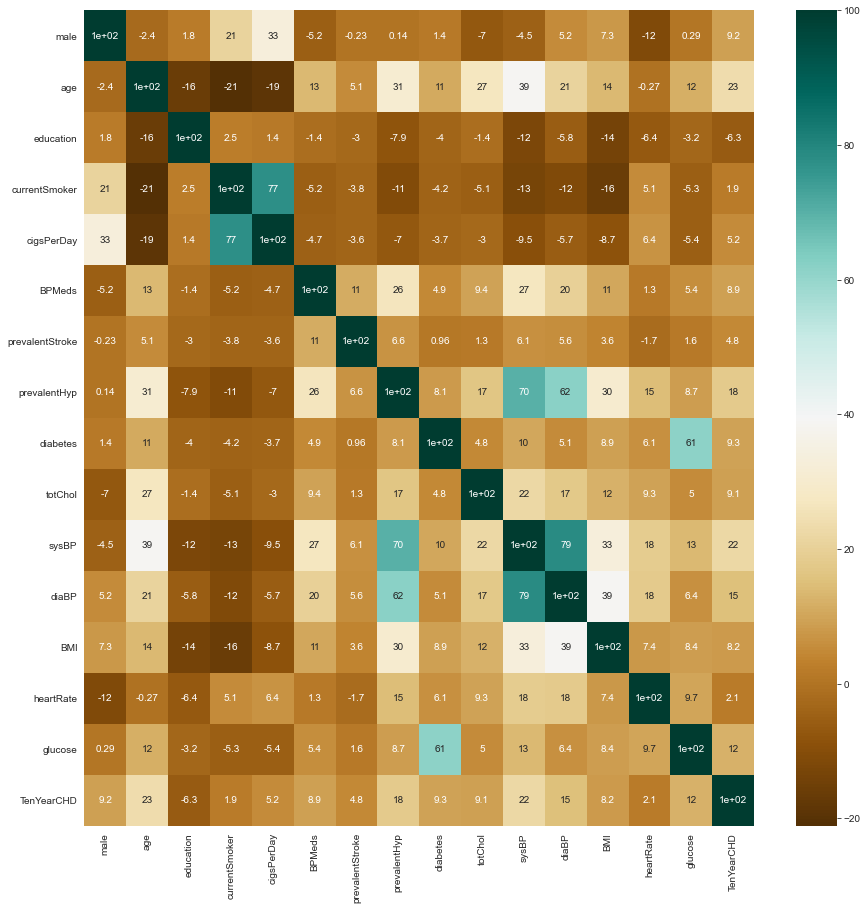

In [26]:
## Corelation of data
plt.figure(figsize = (15, 15))
sns.heatmap(new_data.corr()* 100, annot= True, cmap = "BrBG" )

The medical history(BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose,) of patients consist higher co-relation between them compare to other columns

Text(0.5, 1.0, 'Target Class Count')

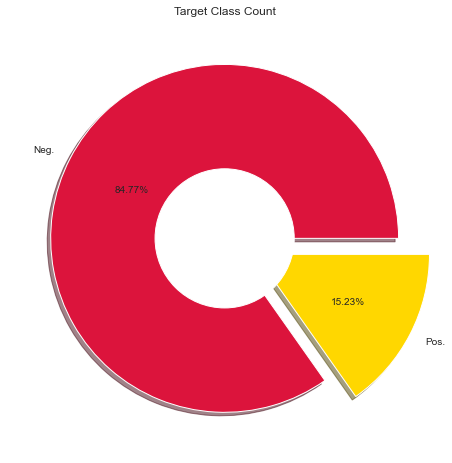

In [27]:
plt.figure(figsize=(8,8))
plt.pie(new_data['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

The above pie plot shows that 84% data consist 'No' TenYearCHD

# Faeture Importance:

In [28]:
X = new_data.iloc[:, 0:14]
Y = new_data.iloc[:, -1]

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Identify the features with the most importance for the outcome variable Heart Disease
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs        Score
13     heartRate  3136.541603
4     cigsPerDay   270.425654
10         sysBP   210.883417
9        totChol   136.963132
11         diaBP    93.339734
7   prevalentHyp    27.267896
0           male    14.095336
5         BPMeds    13.512233
8       diabetes    11.038172
2      education     8.566208
12           BMI     6.735334


In [30]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
13,heartRate,3136.541603
4,cigsPerDay,270.425654
10,sysBP,210.883417
9,totChol,136.963132
11,diaBP,93.339734
7,prevalentHyp,27.267896
0,male,14.095336
5,BPMeds,13.512233
8,diabetes,11.038172
2,education,8.566208


We will only keep those features that have the strongest relationship with the output variable. These features are:

. heartRate

. cigsPerDay

. sysBP

. totChol

. diaBP

. prevalentHyp

. male

. BPMeds

. diabetes

. education

. BMI


. currentSmoker

. age

. prevalentStroke

In [31]:
df = new_data.copy()
df = df.drop(columns = ["AgeGroup", "encode_hr"], axis = 1)

# Feature Scaling:

Feature scaling is a method used to normalize the range of independent variables or features of data.

In [32]:
## data standardization

df_copy = df.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD'], axis=1).index)                     
norm_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.119755,-1.232580,1.975209,-0.978364,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044
1,-0.893053,-0.414905,0.019249,-0.978364,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883
2,1.119755,-0.181283,-0.958730,1.022114,0.920689,-0.176901,-0.075987,-0.672860,-0.166784,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920
3,-0.893053,1.337256,0.997229,1.022114,1.759618,-0.176901,-0.075987,1.486194,-0.166784,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782
4,-0.893053,-0.414905,0.997229,1.022114,1.172368,-0.176901,-0.075987,-0.672860,-0.166784,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672


In [34]:
X = df_copy.drop('TenYearCHD',axis=1)
y = df_copy['TenYearCHD']

# Over and Under Sampling:

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.This undersampling transform can also be used in a Pipeline.

This allows the transform to be applied to the training dataset only using evaluation schemes such as k-fold cross-validation, avoiding any data leakage in the evaluation of a model.

In [35]:
# imports
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

In [36]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)


# Fitting the data to the pipeline

In [37]:
# fit the pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

# Making Predictions

In [38]:
# prediction
pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1113
           1       0.83      0.98      0.90      1058

    accuracy                           0.89      2171
   macro avg       0.90      0.89      0.89      2171
weighted avg       0.90      0.89      0.89      2171



accuracy scores:  0.889912482726854


<AxesSubplot:>

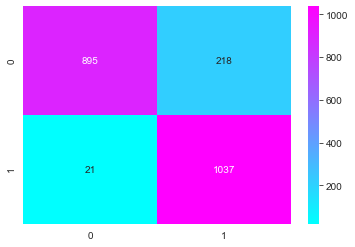

In [40]:
print("accuracy scores: ",accuracy_score(y_test,pred))
# heat map of classification matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='cool', fmt='d')



The accuracy score of decision model is 88%.